<a href="https://colab.research.google.com/github/h-kayotin/hanayo_homework/blob/master/%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0/02_%E5%88%9D%E5%A7%8B%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 加载数据集
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# 查看训练数据
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# 查看测试数据
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)


10000

In [ ]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
# 神经网络架构
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
# 编译
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
# 准备图像数据
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [ ]:
# 拟合模型
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.2660 - accuracy: 0.9235
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1064 - accuracy: 0.9685
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0700 - accuracy: 0.9792
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0505 - accuracy: 0.9849
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0382 - accuracy: 0.9886


In [ ]:
# 利用模型进行预测
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 58ms/step


array([3.2556463e-07, 3.8430787e-09, 2.7273702e-06, 3.8403316e-05,
       1.1657525e-12, 4.5575778e-08, 3.7694023e-12, 9.9995726e-01,
       3.3784396e-08, 1.1033820e-06], dtype=float32)

In [ ]:
predictions[0].argmax()

7

In [ ]:
predictions[0][7]

0.99995726

In [ ]:
# 可以看到7的概率最大，是99%，也确实是7
test_labels[0]

7

In [ ]:
# 在新数据上评估模型
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 0s 1ms/step - loss: 0.0620 - accuracy: 0.9809
test_acc: 0.98089998960495


In [ ]:
import numpy as np
x = np.array(12)
x

array(12)

In [ ]:
x.ndim

0

In [ ]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [ ]:
x.ndim

1

In [ ]:
# 矩阵是2阶张量
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

In [ ]:
# 3阶张量，由多个矩阵组成
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# 轴的个数，说明训练数据是一个3阶张量
train_images.ndim

3

In [ ]:
# 训练数据的形状，表示由60000个28*28的矩阵组成
train_images.shape

(60000, 28, 28)

In [ ]:
# 训练数据的数据类型
train_images.dtype

dtype('uint8')

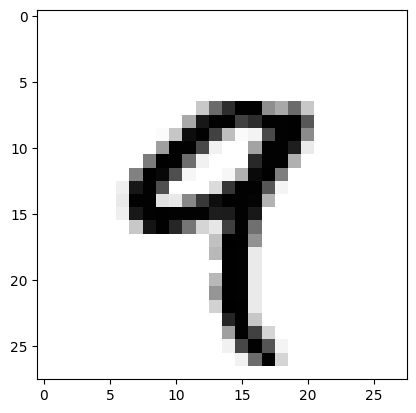

In [ ]:
# 将训练数字的第四个数字进行图形表示
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [ ]:
# 显然，它是数字9
train_labels[4]

9

In [ ]:
# 张量的切片
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [ ]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [ ]:
# 以上2个都是一样的效果，这样写更详细
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [ ]:
# 表示在所有图像，接取14*14的区域
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [ ]:
# 分批处理，一般是128，这叫做批量轴
batch = train_images[:128]
batch = train_images[128:256]
n = 3
batch = train_images[128 * n:128 * (n + 1)]

In [ ]:
# relu运算的手动实现
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [ ]:
# 加运算的实现
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [ ]:
# np内置方法，计算一个20*100的矩阵每个元素相加和relu运算耗时
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [ ]:
# 广播
import numpy as np
# x是一个32*10的矩阵
x = np.random.random((32, 10))
# y是一个随机数组，也就是向量
y = np.random.random((10,))

In [ ]:
y

array([0.25119489, 0.61427656, 0.00358705, 0.88252501, 0.57544612,
       0.78628568, 0.04825829, 0.42828792, 0.83681736, 0.66910617])

In [ ]:
# y的形状变为(1,10)
y = np.expand_dims(y, axis=0)

In [ ]:
y

array([[0.25119489, 0.61427656, 0.00358705, 0.88252501, 0.57544612,
        0.78628568, 0.04825829, 0.42828792, 0.83681736, 0.66910617]])

In [ ]:
# 将y沿着新轴重复32次，就的到了和x形状相同的轴
y = np.concatenate([y] * 32, axis=0)

In [ ]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [ ]:
# np中内置的算法会自动对y进行广播，计算出的z，形状已经和x一样。
import numpy as np
x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

In [ ]:
# 张量积运算
x = np.random.random((32,))
y = np.random.random((32,))
z = np.dot(x, y)

In [ ]:
z

7.894916713164082

In [ ]:
x

array([0.1963045 , 0.83006743, 0.69266776, 0.66317579, 0.22398426,
       0.92283442, 0.71113381, 0.14688548, 0.95563138, 0.57925333,
       0.10299886, 0.47890007, 0.55399087, 0.27367355, 0.12059957,
       0.81378733, 0.48236674, 0.62609814, 0.34515773, 0.42654736,
       0.2962253 , 0.98309339, 0.32805069, 0.26858906, 0.8811986 ,
       0.10682125, 0.35173687, 0.22154595, 0.1280507 , 0.59899883,
       0.1317886 , 0.67270049])

In [ ]:
# 两个向量的张量积的手动实现，可以看出两个向量的张量积是一个标量
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [ ]:
# 张量变形
train_images = train_images.reshape((60000, 28 * 28))

In [ ]:
import numpy as np
x = np.array([[0., 1.],
        [2., 3.],
        [4., 5.]])
x.shape

(3, 2)

In [ ]:
# 把上面的3行2列变成了6行一列
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [ ]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

In [4]:
# 输入数据，数据保存在float32类型的Numpy张量中，形状分别为(6000, 28*28)（训练数据）和(10000, 28*28)（测试数据）
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
# 生成模型
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [ ]:
# 模型编译

In [7]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [8]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
           x = layer(x)
        return x

    @property
    def weights(self):
       weights = []
       for layer in self.layers:
           weights += layer.weights
       return weights

In [9]:
# 简单Dense类
import tensorflow as tf

class NaiveDense:
    def __init__(self, input_size, output_size, activation):
        self.activation = activation

        w_shape = (input_size, output_size)
        w_initial_value = tf.random.uniform(w_shape, minval=0, maxval=1e-1)
        self.W = tf.Variable(w_initial_value)

        b_shape = (output_size,)
        b_initial_value = tf.zeros(b_shape)
        self.b = tf.Variable(b_initial_value)

    def __call__(self, inputs):
        return self.activation(tf.matmul(inputs, self.W) + self.b)

    @property
    def weights(self):
        return [self.W, self.b]

In [10]:
# 利用上面2个类，创建模型
model = NaiveSequential([
    NaiveDense(input_size=28 * 28, output_size=512, activation=tf.nn.relu),
    NaiveDense(input_size=512, output_size=10, activation=tf.nn.softmax)
])
assert len(model.weights) == 4

In [11]:
# 小批量迭代
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

In [12]:
# 一次训练
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        per_sample_losses = tf.keras.losses.sparse_categorical_crossentropy(
            labels_batch, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

In [13]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign_sub(g * learning_rate)

In [14]:
from tensorflow.keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

In [15]:
# 完整的训练循环
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [16]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 5.17
loss at batch 100: 2.24
loss at batch 200: 2.23
loss at batch 300: 2.09
loss at batch 400: 2.28
Epoch 1
loss at batch 0: 1.93
loss at batch 100: 1.89
loss at batch 200: 1.86
loss at batch 300: 1.73
loss at batch 400: 1.89
Epoch 2
loss at batch 0: 1.60
loss at batch 100: 1.59
loss at batch 200: 1.54
loss at batch 300: 1.43
loss at batch 400: 1.56
Epoch 3
loss at batch 0: 1.34
loss at batch 100: 1.35
loss at batch 200: 1.26
loss at batch 300: 1.21
loss at batch 400: 1.31
Epoch 4
loss at batch 0: 1.15
loss at batch 100: 1.17
loss at batch 200: 1.06
loss at batch 300: 1.05
loss at batch 400: 1.13
Epoch 5
loss at batch 0: 1.00
loss at batch 100: 1.04
loss at batch 200: 0.92
loss at batch 300: 0.93
loss at batch 400: 1.01
Epoch 6
loss at batch 0: 0.89
loss at batch 100: 0.93
loss at batch 200: 0.81
loss at batch 300: 0.84
loss at batch 400: 0.91
Epoch 7
loss at batch 0: 0.81
loss at batch 100: 0.84
loss at batch 200: 0.73
loss at batch 300: 0.77
loss at batch 40

In [18]:
# 评估模型
import numpy as np
predictions = model(test_images)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
print(f"accuracy: {matches.mean():.2f}")

accuracy: 0.81
